In [2]:
#Import pandas, numpy, matplotlib, and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [3]:
#Let's take a quick look at how the data is set up
df = pd.read_csv('kickstarter_data_with_features.csv')
df.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,...,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch,launch_to_deadline,launch_to_state_change
0,0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,...,29,2014,22,12,17,2014,13,17 days 14:51:39.000000000,36 days 20:47:24.000000000,NaN
1,1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,...,20,2015,9,3,2,2015,16,10 days 06:44:39.000000000,60 days 00:00:00.000000000,NaN
2,2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,...,24,2015,0,1,25,2015,8,1 days 08:08:58.000000000,60 days 00:00:00.000000000,NaN
3,3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,...,5,2014,22,9,6,2014,0,0 days 02:11:17.000000000,30 days 00:00:00.000000000,NaN
4,4,1613604977,"{""small"":""https://ksr-ugc.imgix.net/assets/012...","Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,...,25,2016,14,5,26,2016,5,0 days 15:47:38.000000000,32 days 06:02:33.000000000,NaN


In [4]:
#I'd like to see what the breakdown of failed versus successful campaigns looks like
campaigns = df.groupby('state')['id'].count()
campaigns

state
canceled       2460
failed        11416
live            508
successful     6018
suspended       230
Name: id, dtype: int64

In [5]:
campaigns.describe()

count        5.000000
mean      4126.400000
std       4684.230438
min        230.000000
25%        508.000000
50%       2460.000000
75%       6018.000000
max      11416.000000
Name: id, dtype: float64

[Text(0,0.5,'Count'), Text(0.5,0,'Campaign Creation Year')]

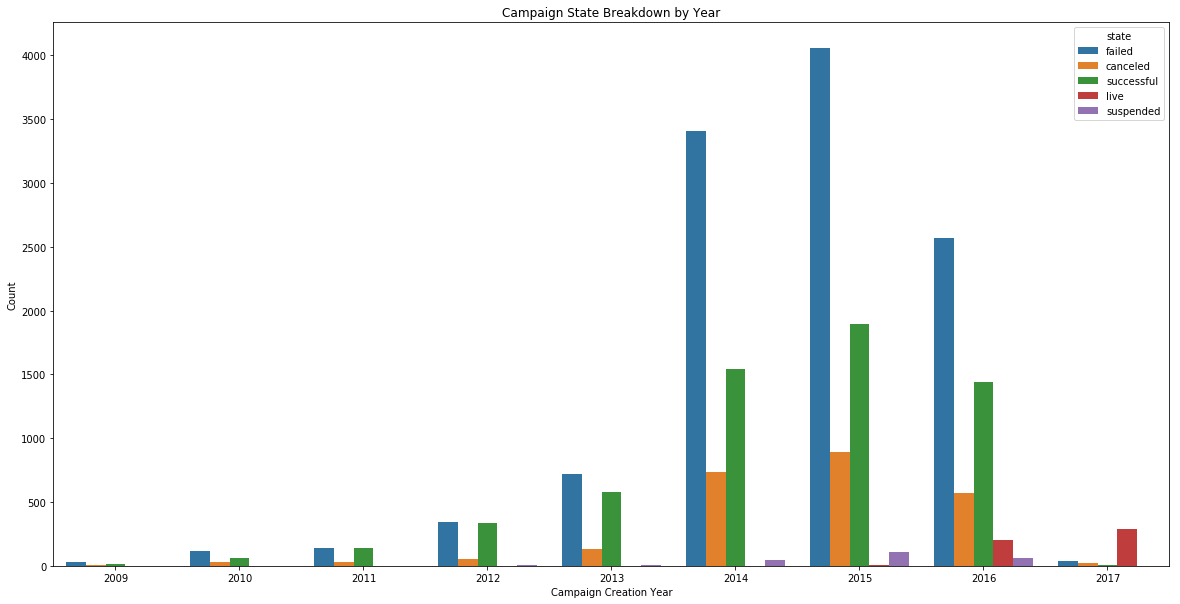

In [6]:
#Let's visualize this breakdwon

plt.figure(figsize=(20,10))
ax = sns.countplot(x='created_at_yr', hue='state', data=df)
plt.title('Campaign State Breakdown by Year')
ax.set(xlabel='Campaign Creation Year', ylabel='Count')

Text(6.8,0.5,'Goal')

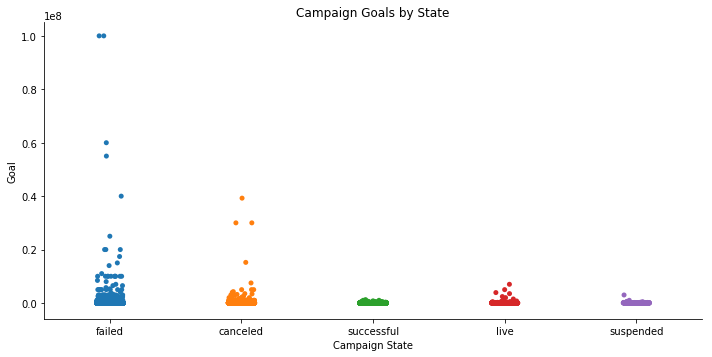

In [7]:
#Seeing what the goals look like, with regard to campaign state
sns.catplot(x='state', y='goal', data=df, height=5, aspect=2)
plt.title('Campaign Goals by State')
plt.xlabel('Campaign State')
plt.ylabel('Goal')

#Successful campaigns are clustered more tightly. Failed and cancelled campaigns have extreme outliers

In [8]:
#Let's further explore some of these different variables around "successful" campaigns
campaigns_mean = df.groupby('state')['goal'].mean()
campaigns_mean

#Perhaps these extreme outliers make the mean a less-than-ideal measure of central tendency

state
canceled      142866.091260
failed        122643.423843
live          100202.362205
successful     21173.206160
suspended      50880.773913
Name: goal, dtype: float64

In [9]:
#Maybe the median is a more accurate representation?
campaigns_median = df.groupby('state')['goal'].median()
campaigns_median

state
canceled      25000.0
failed        16940.5
live          20000.0
successful     5750.0
suspended     10000.0
Name: goal, dtype: float64

In [10]:
#Mode across all campaign states
df['goal'].mode()

0    10000.0
dtype: float64

In [11]:
#Mode by campaign state - using a lambda function to apply the mode across each category of state
df.groupby('state').goal.apply(lambda x: x.mode()).reset_index(0)

,state,goal
0,canceled,50000.0
0,failed,10000.0
0,live,50000.0
0,successful,5000.0
0,suspended,10000.0


In [12]:
#In our visualization, we noticed more robust data in years 2014, 2015, and 2016
#Let's hone in on '14-'16 (subsetting data)
df2 = df.loc[df['created_at_yr'].isin([2014, 2015, 2016])]

[Text(0,0.5,'Count'), Text(0.5,0,'Campaign Creation Year')]

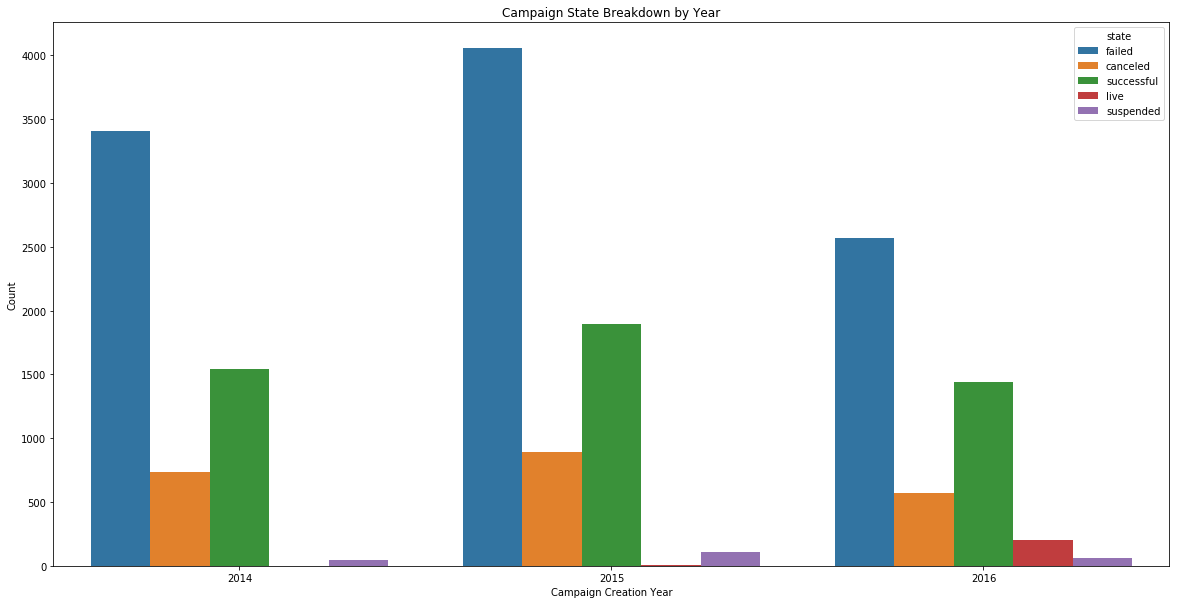

In [13]:
#Let's re-examine our previous visualization after isolating 2014-2016
plt.figure(figsize=(20,10))
ax = sns.countplot(x='created_at_yr', hue='state', data=df2)
plt.title('Campaign State Breakdown by Year')
ax.set(xlabel='Campaign Creation Year', ylabel='Count')

In [14]:
#Let's see how alike our successful and failed populations are in '14-'16
#Create variables to use for our t-test
succ_var2 = df2[df2.state == 'successful'].goal
fail_var2 = df2[df2.state == 'failed'].goal

In [15]:
#Perform a t-test on these populations
stats.ttest_ind(succ_var2, fail_var2)

Ttest_indResult(statistic=-4.201934132993171, pvalue=2.6618482441487684e-05)

In [16]:
#Let's see the counts again
campaigns2 = df2.groupby('state')['id'].count()
campaigns2

state
canceled       2191
failed        10034
live            216
successful     4874
suspended       220
Name: id, dtype: int64

In [18]:
#I want to see the range (min and max) of the successful campaigns
succ_var2.describe()

count       4874.000000
mean       19874.992204
std        42473.777715
min            1.000000
25%         1713.250000
50%         5000.000000
75%        20000.000000
max      1000000.000000
Name: goal, dtype: float64

In [19]:
#after seeing that no successful campaign was run where the goal was more than $1M, lets limit our dataset so 
#we can assess on a more level playing field
df3 = df2[df2.goal <= 1000000]
df3

,Unnamed: 0,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,...,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch,launch_to_deadline,launch_to_state_change
0,0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,...,29,2014,22,12,17,2014,13,17 days 14:51:39.000000000,36 days 20:47:24.000000000,NaN
1,1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,...,20,2015,9,3,2,2015,16,10 days 06:44:39.000000000,60 days 00:00:00.000000000,NaN
2,2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,...,24,2015,0,1,25,2015,8,1 days 08:08:58.000000000,60 days 00:00:00.000000000,NaN
3,3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,...,5,2014,22,9,6,2014,0,0 days 02:11:17.000000000,30 days 00:00:00.000000000,NaN
4,4,1613604977,"{""small"":""https://ksr-ugc.imgix.net/assets/012...","Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,...,25,2016,14,5,26,2016,5,0 days 15:47:38.000000000,32 days 06:02:33.000000000,NaN
5,5,808486483,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Shadow School Board - Reforming Texas School B...,Shadow School Board will provide parents & tax...,13000.0,1136.0,failed,shadow-school-board-reforming-texas-school-boards,False,...,19,2015,7,10,21,2015,10,2 days 03:04:16.000000000,30 days 00:00:00.000000000,NaN
6,6,883246296,"{""small"":""https://ksr-ugc.imgix.net/assets/012...","Research in HIV prevention, treatment, and aid",I want to create an organization that is compo...,50000.0,0.0,failed,research-in-hiv-prevention-treatment-and-aid,False,...,29,2015,20,4,29,2015,22,0 days 01:15:22.000000000,30 days 00:00:00.000000000,NaN
7,7,242834615,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Cardinal Investment Club,Group of passionate and eager students gaining...,10000.0,0.0,failed,cardinal-investment-club,False,...,13,2015,9,8,13,2015,10,0 days 01:14:12.000000000,45 days 00:00:00.000000000,NaN
8,8,2079785043,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",V.I.P.-Architecture,"V.I.P.-Architecture shows the most iconic, the...",6000.0,153.0,failed,vip-architecture,False,...,5,2016,10,2,7,2016,5,1 days 18:56:48.000000000,30 days 00:00:00.000000000,NaN
9,9,1624645868,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Collected Works of Ross Wells,"A collection of plays, screenplays, and photog...",15000.0,0.0,failed,collected-works-of-ross-wells,False,...,1,2015,9,11,2,2015,17,1 days 08:16:11.000000000,30 days 00:00:00.000000000,NaN


Text(-21.2,0.5,'Goal')

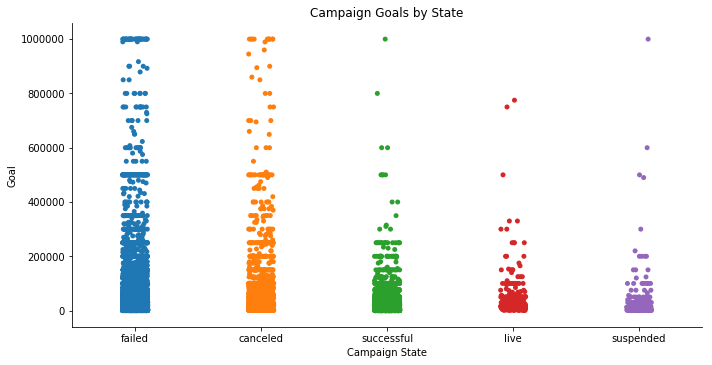

In [20]:
#I want to now reassess the breakdown in campaign states using this sub-set data
sns.catplot(x='state', y='goal', data=df3, height=5, aspect=2)
plt.title('Campaign Goals by State')
plt.xlabel('Campaign State')
plt.ylabel('Goal')

In [21]:
campaigns_mean = df3.groupby('state')['goal'].mean()
campaigns_mean

state
canceled      67742.954651
failed        50513.669151
live          59296.403756
successful    19874.992204
suspended     38637.342466
Name: goal, dtype: float64

In [81]:
#Let's take another look at our t-tests
succ_var3 = df3[df3.state == 'successful'].goal
fail_var3 = df3[df3.state == 'failed'].goal
stats.ttest_ind(succ_var3, fail_var3)
# Results indicate that the mean goal for successful and failed campaign states are signicantly different, such that
# successful campaigns had significantly lower mean goals compared to failed campaign goals. Eliminating datapoints
# above 1 mil decreased the pvalue and increased absolute value of tvalue

Ttest_indResult(statistic=-19.087472134729026, pvalue=2.949139843548953e-80)

In [82]:
#Interesting, let's see the counts again for our new dataframe
campaigns3 = df3.groupby('state')['id'].count()
campaigns3

state
canceled      2161
failed        9929
live           213
successful    4874
suspended      219
Name: id, dtype: int64

In [96]:
#Assessing the variance from our '14-'16 data
fail_var2.describe()

count    1.003400e+04
mean     1.270398e+05
std      1.780239e+06
min      1.000000e+00
25%      5.000000e+03
50%      1.650000e+04
75%      5.000000e+04
max      1.000000e+08
Name: goal, dtype: float64

In [102]:
#Assessing the variance from our '14-'16 data with a goal cap of $1M
fail_var3.describe()

count       9929.000000
mean       50513.669151
std       108038.561420
min            1.000000
25%         5000.000000
50%        15000.000000
75%        50000.000000
max      1000000.000000
Name: goal, dtype: float64

[Text(0,0.5,'Campaign Category'), Text(0.5,0,'Count')]

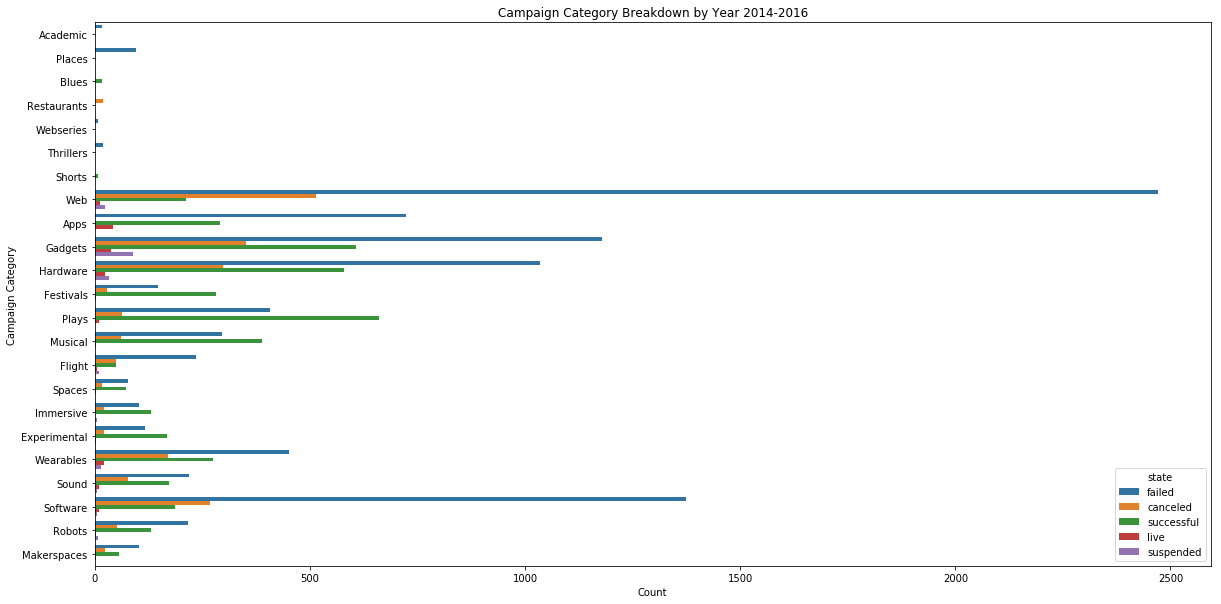

In [105]:
plt.figure(figsize=(20,10))
ax = sns.countplot(y='category', hue='state', data=df2)
plt.title('Campaign Category Breakdown by Year 2014-2016')
ax.set(xlabel='Count', ylabel='Campaign Category')

In [112]:
#Let's look at the most frequently failing categories
df_fail_cat = df.loc[df['category'].isin(['Web', 'Software'])]

[Text(0,0.5,'Campaign Category'), Text(0.5,0,'Count')]

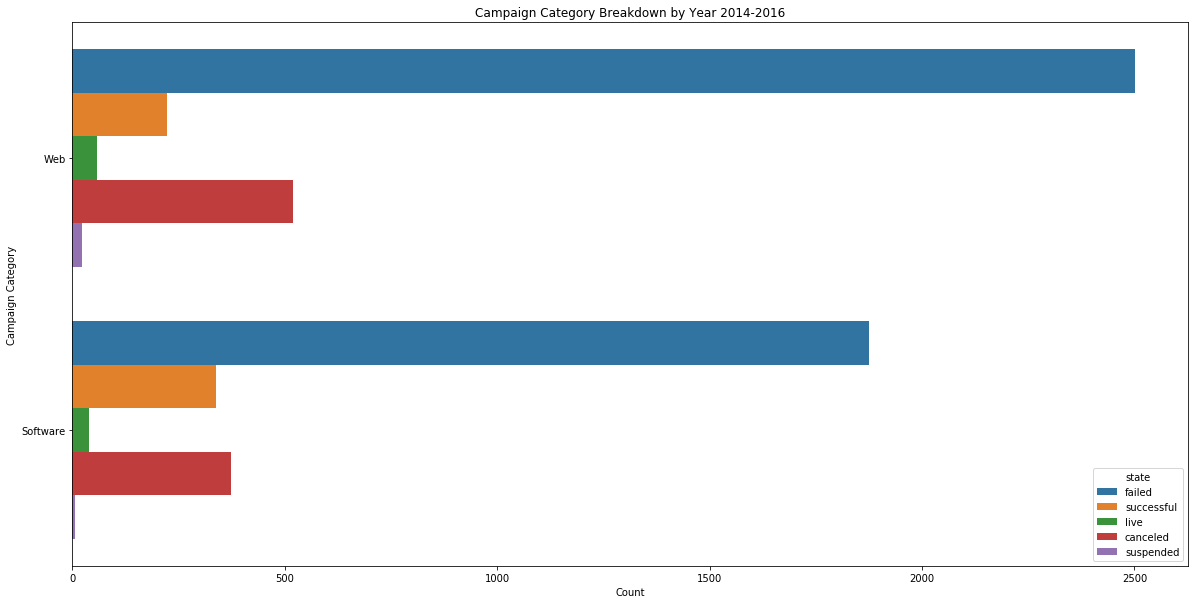

In [113]:
plt.figure(figsize=(20,10))
ax = sns.countplot(y='category', hue='state', data=df_fail_cat)
plt.title('Campaign Category Breakdown by Year 2014-2016')
ax.set(xlabel='Count', ylabel='Campaign Category')

In [115]:
bad_cat_succ = df_fail_cat[df_fail_cat.state == 'successful'].goal
bad_cat_fail = df_fail_cat[df_fail_cat.state == 'failed'].goal
stats.ttest_ind(bad_cat_succ, bad_cat_fail)

# This looks at the combined "bad categories" in terms of campaign state 
# We can observe that this doesn't support our hypothesis in the "bad categories"
# Future directions would include assessing further categories with high fail rates

Ttest_indResult(statistic=-1.39905824391444, pvalue=0.16185836369789794)

In [108]:
#Let's look at the most frequently succeeding categories
df_succ_cat = df.loc[df['category'].isin(['Plays', 'Musical'])]

[Text(0,0.5,'Campaign Category'), Text(0.5,0,'Count')]

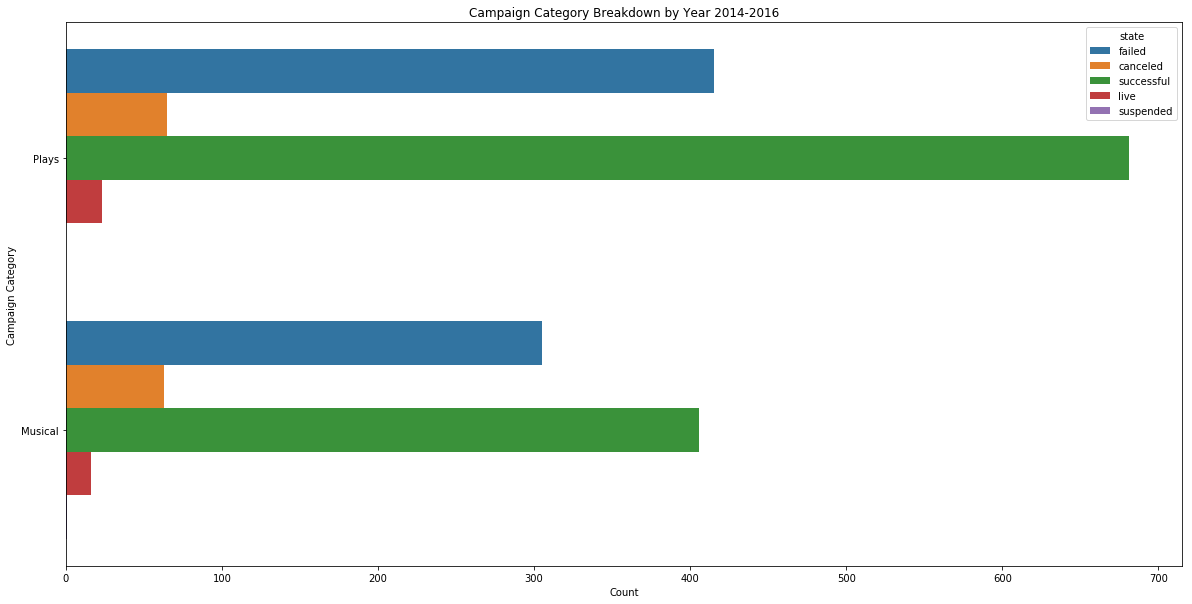

In [109]:
plt.figure(figsize=(20,10))
ax = sns.countplot(y='category', hue='state', data=df_succ_cat)
plt.title('Campaign Category Breakdown by Year 2014-2016')
ax.set(xlabel='Count', ylabel='Campaign Category')

In [116]:
good_cat_succ = df_succ_cat[df_succ_cat.state == 'successful'].goal
good_cat_fail = df_succ_cat[df_succ_cat.state == 'failed'].goal
stats.ttest_ind(good_cat_succ, good_cat_fail)

# This looks at the combined "good categories" in terms of campaign state 
# We can observe that this does support our hypothesis in the "good categories"
# Future directions would include assessing further categories with high success rates

Ttest_indResult(statistic=-2.7369410790987105, pvalue=0.006262150338270874)